This code produces the results in the final paper as it was accepted 12 March 2022. Note that 'remote_runs_NOx' contains the data associated with a constant, 0 land-use scenario over the whole experimental period. 

This notebook contains the most streamlined calculation of the commitment years, carbon budgets and reversibility.

The treatment of SSPs using 'SSPs_mine' is accurate for this version of FaIR

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pandas as pd

import fair
from matplotlib import pyplot as plt
from fair.forward3 import fair_scm
from fair.ancil import natural

In [2]:
from fair.SSPs_mine import ssp119, ssp126, ssp245, ssp370, ssp370_lowNTCF, ssp434, ssp460, ssp585

/data0/mdvorak/FAIR-master/fair/SSPs_mine/ssps.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SSP_370 = SSPs[SSP_370][~lowNTCF]


In [3]:
import seaborn as sns

In [4]:
T_119_alloff = np.load('../FAIR-master/remote_runs_NOx/T_119_alloff.npy')
T_245_alloff = np.load('../FAIR-master/remote_runs_NOx/T_245_alloff_full.npy')
T_126_alloff = np.load('../FAIR-master/remote_runs_NOx/T_126_alloff.npy')
T_370_alloff = np.load('../FAIR-master/remote_runs_NOx/T_370_alloff.npy')
T_370_low_alloff = np.load('../FAIR-master/remote_runs_NOx/T_370_lowNTCF_alloff.npy')
T_434_alloff = np.load('../FAIR-master/remote_runs_NOx/T_434_alloff.npy')
T_460_alloff = np.load('../FAIR-master/remote_runs_NOx/T_460_alloff.npy')
T_585_alloff = np.load('../FAIR-master/remote_runs_NOx/T_585_alloff.npy')

In [5]:
nt = T_245_alloff.shape[0]
nt

336

In [6]:
SSP_119 = ssp119.Emissions_119.emissions[:nt]
SSP_245 = ssp245.Emissions_245.emissions[:nt]
SSP_126 = ssp126.Emissions_126.emissions[:nt]
SSP_370 = ssp370.Emissions_370.emissions[:nt]
SSP_370_lowNTCF = ssp370_lowNTCF.Emissions_370_lowNTCF.emissions[:nt]
SSP_434 = ssp434.Emissions_434.emissions[:nt]
SSP_460 = ssp460.Emissions_460.emissions[:nt]
SSP_585 = ssp585.Emissions_585.emissions[:nt]

In [7]:
SSP_list = ['119','126','434', '245','460','370_low','370','585']
SSPs = [SSP_119, SSP_126, SSP_434, SSP_245, SSP_460, SSP_370_lowNTCF, SSP_370, SSP_585] 

#This order is very important. Do not change!

In [8]:
# Upload model outputs

T_119 = np.load('../FAIR-master/remote_runs_NOx/T_119.npy')
T_245 = np.load('../FAIR-master/remote_runs_NOx/T_245.npy')
T_126 = np.load('../FAIR-master/remote_runs_NOx/T_126.npy')
T_370 = np.load('../FAIR-master/remote_runs_NOx/T_370.npy')
T_370_low = np.load('../FAIR-master/remote_runs_NOx/T_370_lowNTCF.npy')
T_434 = np.load('../FAIR-master/remote_runs_NOx/T_434.npy')
T_460 = np.load('../FAIR-master/remote_runs_NOx/T_460.npy')
T_585 = np.load('../FAIR-master/remote_runs_NOx/T_585.npy')

In [9]:
from collections import defaultdict

In [10]:
T = defaultdict(list)

T_list = [T_119, T_126, T_434, T_245, T_460, T_370_low, T_370, T_585]
percentile = [17, 50, 33, 83]

for i in range(len(T_list)):
    for percent in percentile:
        T[SSP_list[i]].append(np.percentile(T_list[i],percent, axis=1))

In [11]:
T_alloff = defaultdict(list)

T_alloff_list = [T_119_alloff, T_126_alloff, T_434_alloff, T_245_alloff, T_460_alloff,
                 T_370_low_alloff, T_370_alloff, T_585_alloff]

percentile = [17, 50, 33, 83]

for i in range(len(T_alloff_list)):
    for j in range(len(percentile)):
        T_alloff[SSP_list[i]].append(np.percentile(T_alloff_list[i],percentile[j], axis=1))

In [12]:
maximum_year = defaultdict(list)
maximum_temp = {}
longterm = {}

for SSP in SSP_list:
    for i in range(60): 
        maximum_year[SSP].append(T_alloff[SSP][1][:,i].argmax(axis=0)) # Index of 1 is 50th %
        
    maximum_temp[SSP] = np.zeros((4,60))
    longterm[SSP] = np.zeros((4,60))
    
    for j in range(len(percentile)):
        for i in range(60): 
            maximum_temp[SSP][j][i] = T_alloff[SSP][j][maximum_year[SSP][i],i]
            longterm[SSP][j][i] = T_alloff[SSP][j][335,i]

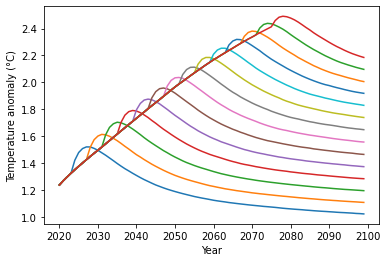

In [13]:
# Take a look at median emission scenario

T_alloff['245'][1].shape # 50th percentile


for i in range(1,15):
    plt.plot(SSP_119[2020-1765:2100-1765,0], T_alloff['245'][1][2020-1765:2100-1765,i*4])
    
plt.xlabel('Year')
plt.ylabel('Temperature anomaly (°C)');

In [14]:
# calculate cumulative emissions along any emissions pathway

def cumulative_carbon(SSP): # takes arg. SSP_126, etc. (SSPs[i])
    emissions = SSP[:,1]
    cumulative_emissions = np.cumsum(emissions[2020-1765:2100-1765])*3.67
    cumulative_emis = cumulative_emissions - cumulative_emissions[0]
    return cumulative_emis

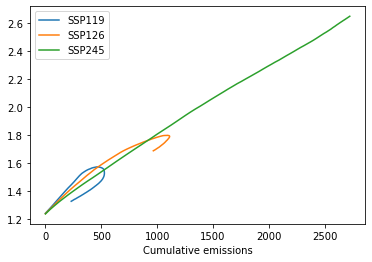

In [20]:
# Some emissions go net-negative. Plot to see when

plt.plot(cumulative_carbon(SSP_119), T['119'][1][2020-1765:2100-1765], label='SSP119')
plt.plot(cumulative_carbon(SSP_126), T['126'][1][2020-1765:2100-1765], label='SSP126') 
plt.plot(cumulative_carbon(SSP_245), T['245'][1][2020-1765:2100-1765], label='SSP245')
plt.legend()
plt.xlabel('Cumulative emissions');

In [22]:
time = SSP_585[2015-1765:,0]

In [24]:
color_wheel = ['#00a9cf','#003466', '#2274ae', '#f69320', '#b0724e','#e61d25', '#df0000', '#980002']
labels = ['SSP1-1.9','SSP1-2.6','SSP4-3.4', 'SSP2-4.5', 'SSP4-6.0','SSP3-7.0-lowNTCF','SSP3-7.0','SSP5-8.5']

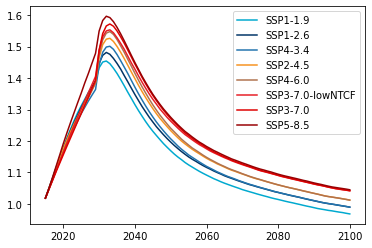

In [28]:
# Take a look at a shut-off of emissions in year 2030

fig, ax = plt.subplots()

for i, SSP in enumerate(SSP_list):
    ax.plot(time, T_alloff[SSP][2][2015-1765:,10], color=color_wheel[i], label=labels[i])

plt.legend();

In [29]:
# calculate how long the overshoot lasts for each SSP, at each percentile

def reversibility(SSP, percent_index):
    reverse = []
    for i in range(T_alloff[SSP][percent_index].shape[1]): #60
        for k in range((2020-1765)+(i-1),2100-1765):
            if T_alloff[SSP][percent_index][k,i] < T_alloff[SSP][percent_index][(2020-1765)+(i-1),i]:
                reverse.append(k-(2020-1765+(i-1)))
                break
    return np.array(reverse)

In [30]:
def print_mean_reversibility():
    for SSP in SSP_list:
        print(SSP, 'minimum', reversibility(SSP,2).min())
        print(SSP, 'maximum', reversibility(SSP,2).max())

In [33]:
# Upload CO2-only run

T_245_CO2 = np.load('../FAIR-master/remote_runs_NOx/Sensitivity_tests/CO2/T_245_CO2_off.npy')*0.945428

In [34]:
nc = len(T_245_CO2[1])
nc

6729

In [35]:
T_245_CO2_5th= np.percentile(T_245_CO2, 5, axis=1)
T_245_CO2_17th= np.percentile(T_245_CO2, 17, axis=1)
T_245_CO2_50th= np.percentile(T_245_CO2, 50, axis=1)
T_245_CO2_83rd= np.percentile(T_245_CO2, 83, axis=1)
T_245_CO2_95th= np.percentile(T_245_CO2, 95, axis=1)

In [36]:
F_119 = np.load('../FAIR-master/remote_runs_NOx/F_119.npy')
F_245 = np.load('../FAIR-master/remote_runs_NOx/F_245_test.npy')
F_126 = np.load('../FAIR-master/remote_runs_NOx/F_126.npy')
F_370 = np.load('../FAIR-master/remote_runs_NOx/F_370.npy')
F_370_low = np.load('../FAIR-master/remote_runs_NOx/F_370_lowNTCF.npy')
F_434 = np.load('../FAIR-master/remote_runs_NOx/F_434.npy')
F_460 = np.load('../FAIR-master/remote_runs_NOx/F_460.npy')
F_585 = np.load('../FAIR-master/remote_runs_NOx/F_585.npy')

In [37]:
F = defaultdict(list)

F_list = [F_119-F_119[0,:,:],
          F_126-F_126[0,:,:], 
          F_434-F_434[0,:,:],
          F_245-F_245[0,:,:],
          F_460-F_460[0,:,:],
          F_370_low-F_370_low[0,:,:],
          F_370-F_370[0,:,:],
          F_585-F_585[0,:,:]]

percentile = [17, 50, 33, 83]

for i in range(len(F_list)):
    for percent in percentile:
        F[SSP_list[i]].append(np.percentile(F_list[i],percent, axis=2))

In [38]:
# calculate probability that we have already committed ourselves to 1.5 degrees of warming by the beginning of 2021

def overshoot(shut_off_year, temp):
    overshoot_list = []
    for i in range(nc):
        if T_245_alloff[maximum_years_2[shut_off_year],i, shut_off_year] > temp:
            overshoot_list.append(i)

    return print((len(overshoot_list)/nc)*100)

In [39]:
def overshoot_longterm(shut_off_year,temp):
    overshoot_list = []
    for i in range(nc):
        if T_245_alloff[335,i, shut_off_year] > temp:
            overshoot_list.append(i)
    return print((len(overshoot_list)/nc)*100)

In [40]:
def committed_year(SSP, temp):
    scenarios = np.zeros(4)
    for i in range(len(SSP)):
        for j in range(len(SSP[i])):
            if temp < SSP[i][j] and j<=60:
                scenarios[i] = (2020+j)
                break
            elif temp < SSP[i][j] and j>60:
                scenarios[i] = (1765+j)
                break
    return scenarios

In [41]:
def carbon_budget(SSP, SSP_emissions, temp): # Note that this gives big numbers for values less than 0, because it's
    #working backward from zero.
    
    carbon = np.zeros(4)
    for i in range(len(SSP)):
        for j in range(len(SSP[i])):
            if temp < SSP[i][j] and j<=60:
                carbon[i] = np.round(cumulative_carbon(SSP_emissions)[j-1], -1)
                break
            elif temp < SSP[i][j] and j>60:
                carbon[i] = np.round(cumulative_carbon(SSP_emissions)[j+1765-2020-1], -1)
                break
    return carbon

In [44]:
#Probability of long-term warming exceeding 1.5C today (~5%)

overshoot_longterm(1,1.5)

4.859563085153812


In [45]:
index_labels = ['SSP1-1.9 peak warming', 'SSP1-1.9 2100 warming', 'SSP1-1.9 no cessation',
'SSP1-2.6 peak warming', 'SSP1-2.6 2100 warming', 'SSP1-2.6 no cessation',
'SSP4-3.4 peak warming', 'SSP4-3.4 2100 warming', 'SSP4-3.4 no cessation',
'SSP2-4.5 peak warming', 'SSP2-4.5 2100 warming', 'SSP2-4.5 no cessation',
'SSP4-6.0 peak warming', 'SSP4-6.0 2100 warming', 'SSP4-6.0 no cessation',
'SSP3-7.0_lowNTCF peak warming', 'SSP3-7.0_lowNTCF warming', 'SSP3-7.0_lowNTCF no cessation',
'SSP3-7.0 peak warming', 'SSP3-7.0 2100 warming', 'SSP3-7.0 no cessation',
'SSP5-8.5 peak warming', 'SSP5-8.5 2100 warming', 'SSP5-8.5 no cessation']

In [46]:
index_labels_CO2 = ['Peak warming', '2100 warming', 'No cessation']

In [47]:
# create an empty table

import pandas as pd

one_point_five = pd.DataFrame(index = index_labels, 
                              columns=['17th', '50th', '66th', '83rd'])

one_point_seven = pd.DataFrame(index = index_labels, 
                              columns=['17th', '50th', '66th', '83rd'])

two_point_0 = pd.DataFrame(index = index_labels, 
                              columns=['17th', '50th', '66th', '83rd'])

In [48]:
carbon_15 = pd.DataFrame(index = index_labels, 
                              columns=['17th', '50th', '66th', '83rd'])

carbon_17 = pd.DataFrame(index = index_labels, 
                              columns=['17th', '50th', '66th', '83rd'])

carbon_20 = pd.DataFrame(index = index_labels, 
                              columns=['17th', '50th', '66th', '83rd'])

In [49]:
# create the list
# peak warming, 2100 warming, no emissions emissions cessation for each SSP
maximum_all = {}
longterm_all = {}
no_cessation_all = {}

for SSP in SSP_list:
    maximum_all[SSP] = [maximum_temp[SSP][3], maximum_temp[SSP][1], maximum_temp[SSP][2], maximum_temp[SSP][0]]
    longterm_all[SSP] = [longterm[SSP][3], longterm[SSP][1], longterm[SSP][2], longterm[SSP][0]]
    no_cessation_all[SSP] = [T[SSP][3], T[SSP][1], T[SSP][2], T[SSP][0]] 

In [50]:
overshoot_list = [maximum_all['119'], longterm_all['119'], no_cessation_all['119'],
                  maximum_all['126'], longterm_all['126'], no_cessation_all['126'],
                  maximum_all['434'], longterm_all['434'], no_cessation_all['434'],
                  maximum_all['245'], longterm_all['245'], no_cessation_all['245'],
                  maximum_all['460'], longterm_all['460'], no_cessation_all['460'],
                  maximum_all['370_low'], longterm_all['370_low'], no_cessation_all['370_low'],
                  maximum_all['370'], longterm_all['370'], no_cessation_all['370'],
                  maximum_all['585'], longterm_all['585'], no_cessation_all['585']]

In [51]:
SSP_list_long = [SSP_119, SSP_119, SSP_119,
                SSP_126, SSP_126, SSP_126,
                SSP_434, SSP_434, SSP_434,
                SSP_245, SSP_245, SSP_245,
                SSP_460, SSP_460, SSP_460,
                SSP_370_lowNTCF, SSP_370_lowNTCF, SSP_370_lowNTCF,
                SSP_370, SSP_370, SSP_370,
                SSP_585, SSP_585, SSP_585]

In [52]:
overshoot_list_CO2 = [maximum_all['245'], longterm_all['245'], no_cessation_all['245']]

In [54]:
def fill_the_frame(df,temp,carbon):
    if carbon==True:
        for i, index in enumerate(index_labels):
            df.loc[index] = carbon_budget(overshoot_list[i],SSP_list_long[i], temp)
    else:
        for i,index in enumerate(index_labels):
            df.loc[index] = committed_year(overshoot_list[i],temp)

In [56]:
fill_the_frame(one_point_five,1.5,False)
fill_the_frame(one_point_seven,1.7,False)
fill_the_frame(two_point_0,2.0,False)

In [57]:
fill_the_frame(carbon_15,1.5,True)
fill_the_frame(carbon_17,1.7,True)
fill_the_frame(carbon_20,2.0,True)

In [58]:
one_point_five

,17th,50th,66th,83rd
SSP1-1.9 peak warming,2020.0,2024.0,0.0,0.0
SSP1-1.9 2100 warming,2036.0,0.0,0.0,0.0
SSP1-1.9 no cessation,2024.0,2030.0,0.0,0.0
SSP1-2.6 peak warming,2020.0,2024.0,2032.0,0.0
SSP1-2.6 2100 warming,2032.0,2062.0,0.0,0.0
SSP1-2.6 no cessation,2024.0,2030.0,2036.0,0.0
SSP4-3.4 peak warming,2020.0,2024.0,2030.0,2044.0
SSP4-3.4 2100 warming,2032.0,2057.0,2072.0,0.0
SSP4-3.4 no cessation,2025.0,2032.0,2038.0,2048.0
SSP2-4.5 peak warming,2020.0,2024.0,2029.0,2037.0


In [ ]:
# Save table as excel spreadsheet

writer = pd.ExcelWriter('../FAIR-master/remote_runs_NOx/Committment_tables.xlsx', engine='xlsxwriter')

In [ ]:
one_point_five.to_excel(writer, sheet_name='Committment_year_1.5')
one_point_seven.to_excel(writer, sheet_name='Committment_year_1.7')
two_point_0.to_excel(writer, sheet_name='Committment_year_2.0')

carbon_15.to_excel(writer, sheet_name='Carbon_budget_1.5')
carbon_17.to_excel(writer, sheet_name='Carbon_budget_1.7')
carbon_20.to_excel(writer, sheet_name='Carbon_budget_2.0')

In [59]:
import xarray as xr

ds = xr.open_dataset('../FAIR-master/HadCRUT_series_global_annual.nc')
Historical_obs = ds.sel(bnds=0).to_dataframe()

T_obs = np.array(Historical_obs['tas_mean'])
T_obs_mean = T_obs[1960-1850:1990-1850].mean()
T_obs_mean_2 = T_obs[0:1900-1850].mean()

T_obs_2 = T_obs + T_obs_mean - T_obs_mean_2

Historical_obs = ds.sel(bnds=0).to_dataframe()

Historical_obs['tas_mean']

time
1850-07-02 12:00:00   -0.417659
1851-07-02 12:00:00   -0.233350
1852-07-02 00:00:00   -0.229399
1853-07-02 12:00:00   -0.270354
1854-07-02 12:00:00   -0.291630
                         ...   
2017-07-02 12:00:00    0.845174
2018-07-02 12:00:00    0.762654
2019-07-02 12:00:00    0.891073
2020-07-02 00:00:00    0.922794
2021-07-02 12:00:00    0.701302
Name: tas_mean, Length: 172, dtype: float64

In [60]:
T_constrained = np.load('../FAIR-master/remote_runs_NOx/Temperature_post_remote.npy')

T_constrained_17th = np.percentile(T_constrained, 17, axis=1)
T_constrained_50th = np.percentile(T_constrained, 50, axis=1)
T_constrained_83rd = np.percentile(T_constrained, 83, axis=1)

In [61]:
F_constrained = np.load('../FAIR-master/remote_runs_NOx/Forcings_post_remote.npy')
F_constrained = F_constrained - F_constrained[0,:,:]

F_constrained_5th = np.percentile(F_constrained, 5, axis=2)
F_constrained_50th = np.percentile(F_constrained, 50, axis=2)
F_constrained_95th = np.percentile(F_constrained, 95, axis=2)

In [62]:
F_prior = np.load('../FAIR-master/remote_runs_NOx/Forcings_prior_remote.npy')
F_prior = F_prior - F_prior[0,:,:]

F_prior_5th = np.percentile(F_prior, 5, axis=2)
F_prior_50th = np.percentile(F_prior, 50, axis=2)
F_prior_95th = np.percentile(F_prior, 95, axis=2)

In [63]:
from matplotlib.ticker import FormatStrFormatter

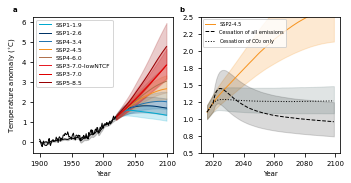

In [79]:

# plt.style.use('seaborn-paper')
# For T_alloff, index of 0 corresponds to a shut-off in year 2020 (year 255)
# For T_CO2, index of 0 corresponds to a shut-off in year 2021 (year 256)

#Nature requested small figure size is 3.46 x 7.09 "
#large figure size is 7.09 x ___ "
#Font size between 5 and 7 pt.

plt.rcParams['figure.figsize'] = (5.5,2.5)
plt.rcParams.update({'font.size': 7})
#subtract the temperature difference between 1850 and 1900 to get a shared baseline for projections and historical record

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

for SSP, color, label in zip(SSP_list,color_wheel,labels):
    ax1.plot(SSP_245[2020-1765:2100-1765,0], T[SSP][1][2020-1765:2100-1765], color=color, linewidth=1, label=label)
    ax1.fill_between(SSP_245[2020-1765:2100-1765,0], T[SSP][0][2020-1765:2100-1765], T[SSP][3][2020-1765:2100-1765], alpha=0.2, color=color)


ax1.set_ylabel('Temperature anomaly ($^{\circ}$C)')
# ax1.plot(SSP_585[1900-1765:2020-1765,0], T_obs_2[1900-1850:2020-1850], color='black')
ax1.plot(SSP_245[1900-1765:2020-1765,0], T_constrained_50th[1900-1765:2020-1765], color='black', linewidth=1)
ax1.fill_between(SSP_245[1900-1765:2020-1765,0], T_constrained_17th[1900-1765:2020-1765], T_constrained_83rd[1900-1765:2020-1765], alpha=0.2,color='black')
ax1.plot(SSP_245[1900-1765:2020-1765,0], T_obs_2[1900-1850:2020-1850], color='black', linewidth=1)
# ax1.axvline(x=2016)
ax1.legend(loc='upper left', fontsize=6)
ax1.set_xlabel('Year')

ax2.plot(SSP_245[2016-1765:2100-1765,0], T['245'][1][2016-1765:2100-1765], color='#F79420', label='SSP2-4.5', linewidth=1)
ax2.fill_between(SSP_245[2016-1765:2100-1765,0], T['245'][0][2016-1765:2100-1765], T['245'][3][2016-1765:2100-1765], alpha=0.2, color='#F79420')

ax2.plot(SSP_245[2016-1765:2100-1765,0], T_alloff['245'][1][2016-1765:2100-1765, 1], color='black', linestyle='dashed', linewidth=1, label='Cessation of all emissions')
ax2.fill_between(SSP_245[2016-1765:2100-1765,0], T_alloff['245'][0][2016-1765:2100-1765, 1], T_alloff['245'][3][2016-1765:2100-1765, 1], alpha=0.15, color='black')

ax2.plot(SSP_245[2016-1765:2100-1765,0], T_245_CO2_50th[2016-1765:2100-1765], color='black', linestyle='dotted', linewidth=1, label='Cessation of CO$_{2}$ only')
ax2.fill_between(SSP_245[2016-1765:2100-1765,0], T_245_CO2_17th[2016-1765:2100-1765], T_245_CO2_83rd[2016-1765:2100-1765], alpha=0.15, color='darkslategray')
ax2.set_ylim(0.5,2.5)

#ax2.plot(SSP_245[2016-1765:2100-1765,0], np.percentile(T_245_CO2_2[2016-1765:2100-1765,:], 50, axis=1), color='black', linestyle='dotted', linewidth=2, label='Cessation of CO$_{2}$ only')



ax2.set_xlabel('Year')
# ax2.axvline(x=2016)
# ax2.legend(bbox_to_anchor=(1.04,0.8),loc='upper left')
ax2.legend(loc='upper left', fontsize=5)
ax1.text(-0.15, 1.04, 'a', transform=ax1.transAxes, 
            size=7, weight='bold')
ax2.text(-0.15, 1.04, 'b', transform=ax2.transAxes, 
            size=7, weight='bold');
#plt.tight_layout();
#plt.savefig('../FAIR-master/remote_runs_NOx/Figures/Small_figures/Figure1.pdf', bbox_inches='tight');

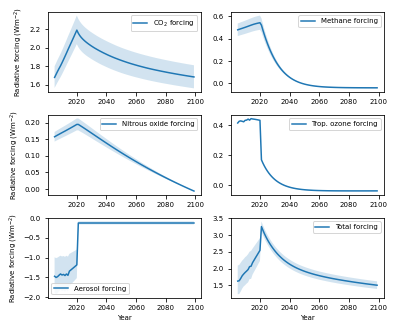

In [77]:
# additional figures for presentation: forcing and temp from abrupt shut-off
sy = 2005-1765
end = 2100-1765
time = SSP_245[sy:end,0]

F_alloff = np.load('remote_runs_NOx/Sensitivity_tests/F_245_alloff_present.npy')
F_alloff = F_alloff - F_alloff[0,:,:]


#plt.rcParams['figure.figsize'] = (16,5.5)
#plt.rcParams.update({'font.size': 7})

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(5.5,4.5))
ax1.plot(time, np.percentile(F_alloff[sy:end,0,:], 50, axis=1), label='CO$_2$ forcing')
ax2.plot(time, np.percentile(F_alloff[sy:end,1,:], 50, axis=1), label='Methane forcing')
ax3.plot(time, np.percentile(F_alloff[sy:end,2,:], 50, axis=1), label='Nitrous oxide forcing')
ax4.plot(time, np.percentile(F_alloff[sy:end,4,:], 50, axis=1), label='Trop. ozone forcing')
ax5.plot(time, np.percentile(F_alloff[sy:end,8,:], 50, axis=1), label='Aerosol forcing')
ax6.plot(time, np.percentile(np.sum(F_alloff[sy:end,:,:], axis=1), 50, axis=1), label='Total forcing')
ax6.fill_between(time, np.percentile(np.sum(F_alloff[sy:end,:,:], axis=1), 17, axis=1), 
                     np.percentile(np.sum(F_alloff[sy:end,:,:], axis=1), 83, axis=1), alpha=0.2) 
agent = [0,1,2,4,8]
for ax,i in zip((ax1,ax2,ax3,ax4,ax5,ax6),agent):
    ax.fill_between(time, np.percentile(F_alloff[sy:end,i,:], 17, axis=1), 
                    np.percentile(F_alloff[sy:end,i,:], 83, axis=1), alpha=0.2)

    if ax == ax1:
        ax.set_ylabel('Radiative forcing (Wm$^{-2}$)')
    elif ax == ax3:
        ax.set_ylabel('Radiative forcing (Wm$^{-2}$)')
    elif ax == ax5:
        ax.set_ylabel('Radiative forcing (Wm$^{-2}$)')
        
    ax.legend(loc='best')
    
ax6.legend()
ax5.set_xlabel('Year')
ax6.set_xlabel('Year')
plt.tight_layout()
plt.savefig('../FAIR-master/remote_runs_NOx/Figures/Small_figures/Forcing_supplementary.pdf');

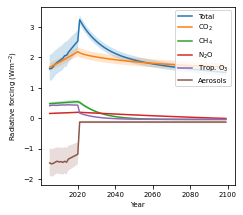

In [97]:
fig, ax1 = plt.subplots(figsize=(3.4,3.0))

ax1.plot(time, np.percentile(np.sum(F_alloff[sy:end,:,:], axis=1), 50, axis=1), label='Total')
ax1.fill_between(time, np.percentile(np.sum(F_alloff[sy:end,:,:], axis=1), 17, axis=1), 
                     np.percentile(np.sum(F_alloff[sy:end,:,:], axis=1), 83, axis=1), alpha=0.2) 
ax1.plot(time, np.percentile(F_alloff[sy:end,0,:], 50, axis=1), label='CO$_2$')
ax1.plot(time, np.percentile(F_alloff[sy:end,1,:], 50, axis=1), label='CH$_4$')
ax1.plot(time, np.percentile(F_alloff[sy:end,2,:], 50, axis=1), label='N$_2$O')
ax1.plot(time, np.percentile(F_alloff[sy:end,4,:], 50, axis=1), label='Trop. O$_3$')
ax1.plot(time, np.percentile(F_alloff[sy:end,8,:], 50, axis=1), label='Aerosols')


agent = [0,1,2,4,8]
for i in agent:
    ax1.fill_between(time, np.percentile(F_alloff[sy:end,i,:], 17, axis=1), 
                    np.percentile(F_alloff[sy:end,i,:], 83, axis=1), alpha=0.2)

ax1.set_ylabel('Radiative forcing (Wm$^{-2}$)')
ax1.set_xlabel('Year')
ax1.legend(loc='upper right')
#ax1.legend(loc='lower right', fontsize=7, bbox_to_anchor=(1.27,0.3));
plt.tight_layout()
plt.savefig('../FAIR-master/remote_runs_NOx/Figures/Small_figures/Forcing_supplementary2.pdf');

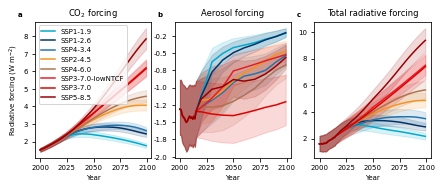

In [74]:
# Visualize the forcing values for each SSP

plt.rcParams['figure.figsize'] = (7.09,2.5)
plt.rcParams.update({'font.size': 7})

#subtract the temperature difference between 1850 and 1900 to get a sha#E71D25 baseline for projections and historical record

fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for SSP, color, label in zip(SSP_list,color_wheel,labels):
    ax1.plot(SSP_245[2000-1765:2100-1765,0], F[SSP][1][2000-1765:2100-1765,0], color=color, label=label)
    ax1.fill_between(SSP_245[2000-1765:2100-1765,0], F[SSP][0][2000-1765:2100-1765,0], F[SSP][3][2000-1765:2100-1765,0], alpha=0.15, color=color)
    
    ax2.plot(SSP_245[2000-1765:2100-1765,0], F[SSP][1][2000-1765:2100-1765,8], color=color, label=label)
    ax2.fill_between(SSP_245[2000-1765:2100-1765,0], F[SSP][0][2000-1765:2100-1765,8], F[SSP][3][2000-1765:2100-1765,8], alpha=0.15, color=color)
    
    ax3.plot(SSP_245[2000-1765:2100-1765,0], np.sum(F[SSP][1][2000-1765:2100-1765,:],axis=1), color=color, label=label)
    ax3.fill_between(SSP_245[2000-1765:2100-1765,0], np.sum(F[SSP][0][2000-1765:2100-1765,:],axis=1), np.sum(F[SSP][3][2000-1765:2100-1765,:],axis=1), alpha=0.15, color=color)

ax1.set_title('CO$_{2}$ forcing')
ax3.set_title('Total radiative forcing')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax2.set_title('Aerosol forcing')
ax1.set_xlabel('Year')
ax2.set_xlabel('Year')
ax3.set_xlabel('Year')
ax1.legend()
ax1.set_ylabel('Radiative forcing (W m$^{-2}$)')
ax1.text(-0.15, 1.04, 'a', transform=ax1.transAxes, 
            size=7, weight='bold')
ax2.text(-0.15, 1.04, 'b', transform=ax2.transAxes, 
            size=7, weight='bold')
ax3.text(-0.15, 1.04, 'c', transform=ax3.transAxes, 
            size=7, weight='bold');


plt.savefig('../FAIR-master/remote_runs_NOx/Figures/Small_figures/SuppFigure1.pdf', bbox_inches='tight');

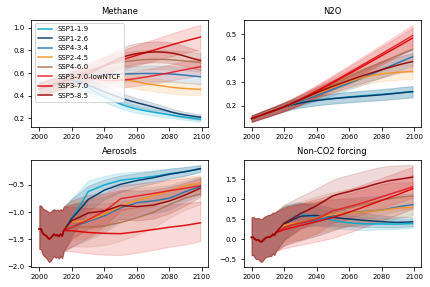

In [67]:
#plt.rcParams.update({'font.size': 15})
#subtract the temperature difference between 1850 and 1900 to get a sha#E71D25 baseline for projections and historical record

fig, axes = plt.subplots(2,2)
(ax1,ax2,ax3,ax4) = axes.flatten()

for SSP, color, label in zip(SSP_list,color_wheel,labels):
    ax1.plot(SSP_245[2000-1765:2100-1765,0], F[SSP][1][2000-1765:2100-1765,1], color=color, alpha=20, label=label)
    ax1.fill_between(SSP_245[2000-1765:2100-1765,0], F[SSP][0][2000-1765:2100-1765,1], F[SSP][3][2000-1765:2100-1765,1], alpha=0.15, color=color)
    
    ax2.plot(SSP_245[2000-1765:2100-1765,0], F[SSP][1][2000-1765:2100-1765,2], color=color, alpha=20, label=label)
    ax2.fill_between(SSP_245[2000-1765:2100-1765,0], F[SSP][0][2000-1765:2100-1765,2], F[SSP][3][2000-1765:2100-1765,2], alpha=0.15, color=color)
    
    ax3.plot(SSP_245[2000-1765:2100-1765,0], F[SSP][1][2000-1765:2100-1765,8], color=color, alpha=20, label=label)
    ax3.fill_between(SSP_245[2000-1765:2100-1765,0], F[SSP][0][2000-1765:2100-1765,8], F[SSP][3][2000-1765:2100-1765,8], alpha=0.15, color=color)
    
    ax4.plot(SSP_245[2000-1765:2100-1765,0], np.sum(F[SSP][1][2000-1765:2100-1765,1:],axis=1), color=color, alpha=20, label=label)
    ax4.fill_between(SSP_245[2000-1765:2100-1765,0], np.sum(F[SSP][0][2000-1765:2100-1765,1:],axis=1), np.sum(F[SSP][3][2000-1765:2100-1765,1:],axis=1), alpha=0.15, color=color)

ax1.set_title('Methane')
ax2.set_title('N2O')
ax3.set_title('Aerosols')
ax4.set_title('Non-CO2 forcing')
ax1.legend(loc='upper left')
plt.tight_layout()

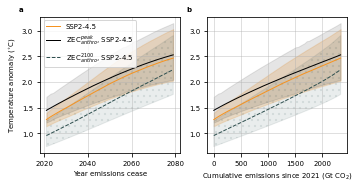

In [23]:
fig = plt.figure(figsize=((5.5,2.5)))

plt.rcParams.update({'font.size': 7})

ax1 = fig.add_subplot(121)
plt.grid(alpha=0.5)
ax2 = fig.add_subplot(122)

ax1.plot(SSP_245[2021-1765:2080-1765,0], T['245'][1][2021-1765:2080-1765], label='SSP2-4.5', linewidth=1, color=color_wheel[3])
ax1.fill_between(SSP_245[2021-1765:2080-1765,0], T['245'][0][2021-1765:2080-1765], T['245'][3][2021-1765:2080-1765], alpha=0.2, color=color_wheel[3])

ax1.plot(SSP_245[2021-1765:2080-1765,0], maximum_temp['245'][1][1:], label='ZEC$^{peak}_{anthro}$, SSP2-4.5', linewidth=1, color='black')
ax1.fill_between(SSP_245[2021-1765:2080-1765,0], maximum_temp['245'][0][1:], maximum_temp['245'][3][1:], alpha=0.1, color='black')

ax1.plot(SSP_245[2021-1765:2080-1765,0], longterm['245'][1][1:], label='ZEC$^{2100}_{anthro}$, SSP2-4.5', linewidth=1, color='darkslategray', linestyle='dashed')
ax1.fill_between(SSP_245[2021-1765:2080-1765,0], longterm['245'][0][1:], longterm['245'][3][1:], alpha=0.1, color='darkslategray', hatch='..')

ax1.set_ylabel('Temperature anomaly ($^{\circ}$C)')

ax1.set_xlabel('Year emissions cease')
ax1.legend(loc='upper left')

ax2.plot(cumulative_carbon(SSP_245)[:59], T['245'][1][2021-1765:2080-1765], label='SSP2-4.5', linewidth=1, color=color_wheel[3])
ax2.fill_between(cumulative_carbon(SSP_245)[:59], T['245'][0][2021-1765:2080-1765], T['245'][3][2021-1765:2080-1765], alpha=0.2, color=color_wheel[3])

ax2.plot(cumulative_carbon(SSP_245)[:59], maximum_temp['245'][1][1:], label='ZEC$^{peak}_{anthro}$, SSP2-4.5', linewidth=1, color='black')
ax2.fill_between(cumulative_carbon(SSP_245)[:59], maximum_temp['245'][0][1:], maximum_temp['245'][3][1:], alpha=0.1, color='black')

ax2.plot(cumulative_carbon(SSP_245)[:59], longterm['245'][1][1:], label='ZEC$^{2100}_{anthro}$, SSP2-4.5', linewidth=1, color='darkslategray',linestyle='dashed')
ax2.fill_between(cumulative_carbon(SSP_245)[:59], longterm['245'][0][1:], longterm['245'][3][1:], alpha=0.1, color='darkslategray', hatch='..')

ax2.set_xlabel('Cumulative emissions since 2021 (Gt CO$_{2}$)')
ax1.text(-0.15, 1.04, 'a', transform=ax1.transAxes, 
            size=7, weight='bold')
ax2.text(-0.15, 1.04, 'b', transform=ax2.transAxes, 
            size=7, weight='bold')
#plt.tight_layout()
plt.grid(alpha=0.5)
plt.savefig('../FAIR-master/remote_runs_NOx/Figures/Small_figures/Figure2_2021.pdf', bbox_inches='tight');

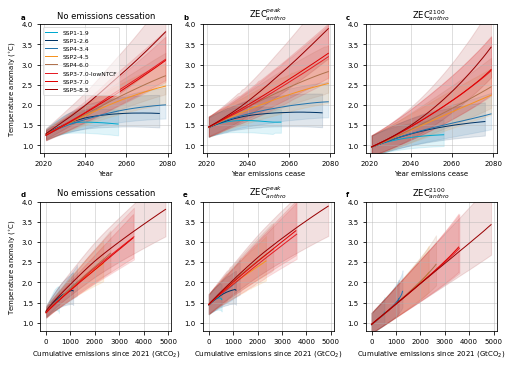

In [22]:
# plot all maximum warming on same axes

plt.rcParams.update({'font.size': 7})

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(7.09,5.09))
ax1,ax2,ax3,ax4,ax5,ax6 = axes.flatten()

year_end = [36, 56, 59, 59, 59, 59, 59, 59] # year in which emissions go net-negative, if ever

for scenario, SSP, color, label, year in zip(SSPs,SSP_list,color_wheel,labels, year_end):
            
    ax1.plot(SSP_245[2021-1765:2021+year-1765,0], T[SSP][1][2021-1765:2021+year-1765], linewidth=1, color=color, label=label)
    ax1.fill_between(SSP_245[2021-1765:2021+year-1765,0], T[SSP][0][2021-1765:2021+year-1765], T[SSP][3][2021-1765:2021+year-1765], alpha=0.12, color=color)

    ax2.plot(SSP_245[2021-1765:2021+year-1765,0], maximum_temp[SSP][1][1:year+1], linewidth=1, color=color, label=label)
    ax2.fill_between(SSP_245[2021-1765:2021+year-1765,0], maximum_temp[SSP][0][1:year+1], maximum_temp[SSP][3][1:year+1], alpha=0.12, color=color)

    ax3.plot(SSP_245[2021-1765:2021+year-1765,0], longterm[SSP][1][1:year+1], linewidth=1, color=color, label=label)
    ax3.fill_between(SSP_245[2021-1765:2021+year-1765,0], longterm[SSP][0][1:year+1], longterm[SSP][3][1:year+1], alpha=0.12, color=color)

    ax4.plot(cumulative_carbon(scenario)[:year], T[SSP][1][2021-1765:2021+year-1765], linewidth=1, color=color, label=label)
    ax4.fill_between(cumulative_carbon(scenario)[:year], T[SSP][0][2021-1765:2021+year-1765], T[SSP][3][2021-1765:2021+year-1765], alpha=0.12, color=color)

    ax5.plot(cumulative_carbon(scenario)[:year], maximum_temp[SSP][1][1:year+1], linewidth=1, color=color, label=label)
    ax5.fill_between(cumulative_carbon(scenario)[:year], maximum_temp[SSP][0][1:year+1], maximum_temp[SSP][3][1:year+1], alpha=0.12, color=color)

    ax6.plot(cumulative_carbon(scenario)[:year], longterm[SSP][1][1:year+1], linewidth=1, color=color, label=label)
    ax6.fill_between(cumulative_carbon(scenario)[:year], longterm[SSP][0][1:year+1], longterm[SSP][3][1:year+1], alpha=0.12, color=color)


ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature anomaly ($^{\circ}$C)')
ax1.legend(loc='best', fontsize=6, framealpha=0.6)

ax4.set_xlabel('Cumulative emissions since 2021 (GtCO$_{2}$)')

ax2.set_xlabel('Year emissions cease')
ax4.set_ylabel('Temperature anomaly ($^{\circ}$C)')

ax5.set_xlabel('Cumulative emissions since 2021 (GtCO$_{2}$)')

ax3.set_xlabel('Year emissions cease')

ax6.set_xlabel('Cumulative emissions since 2021 (GtCO$_{2}$)')

# ax = (ax2,ax3,ax5,ax6)
# for axis in ax:
#     axis.get_yaxis().set_visible(False)


ax = ax1,ax2,ax3,ax4,ax5,ax6
letter = ['a', 'b','c','d','e','f']

ax2.set_title('ZEC$^{peak}_{anthro}$')
ax5.set_title('ZEC$^{peak}_{anthro}$')
ax1.set_title('No emissions cessation')
ax4.set_title('No emissions cessation')
ax3.set_title('ZEC$^{2100}_{anthro}$')
ax6.set_title('ZEC$^{2100}_{anthro}$')
fig.tight_layout()

for ax, let in zip(ax,letter):
    ax.text(-0.15, 1.04, let, transform=ax.transAxes, 
            size=7, weight='bold')

    ax.set_ylim(0.8,4)
#     ax.axhline(y=1.5, color='black', linestyle='dashed')
#     ax.axhline(y=2.0, color='black', linestyle='dashed')
    ax.grid(alpha=0.5)
#plt.tight_layout()
plt.savefig('../FAIR-master/remote_runs_NOx/Figures/Small_figures/Figure3_2021.pdf', bbox_inches='tight');

In [72]:
# calculte slopes, effective TCRE

from scipy.stats import linregress
slope, _, _, _, _ = linregress(cumulative_carbon(SSP_245)[:50], T['245'][1][2018-1765:2068-1765])
print(slope*1000)

0.5334346767263085
